In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel('house_price_dống-da.xlsx')

c:\Users\Acer Nitro5\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
df.columns

Index(['title', 'address', 'area', 'price', 'postDate', 'land_certificate',
       'house_direction', 'balcony_direction', 'toilet', 'bedroom', 'floor',
       'type_of_land', 'street_name', 'ward_name', 'district_name',
       'city_name', 'lat', 'long'],
      dtype='object')

In [14]:
df = df[df['area'] > 0]

In [15]:
df['price/m2'] = round(df['price'] / df['area'], 2)

In [16]:
df['type_of_land'] = df['type_of_land'].str.replace('\n ','')

In [17]:
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,price/m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.00
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105,357.14
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111,73.68
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,177.42
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,514.29


##### Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.

In [18]:
#### Mối liên hệ giữa diện tích và giá nhà 

No handles with labels found to put in legend.


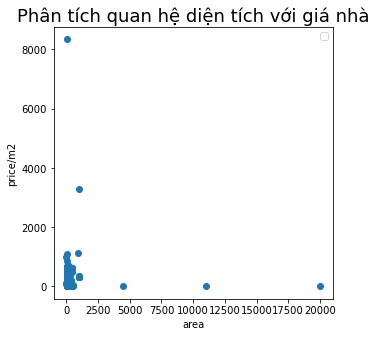

In [32]:
plt.title('Phân tích quan hệ diện tích với giá nhà', fontsize = 18)
plt.rcParams['figure.figsize'] = 5,5
plt.scatter(x = df['area'], y = df['price/m2'])
plt.xlabel('area')
plt.ylabel('price/m2')
plt.legend()
plt.show()


In [33]:
#### Mối liên hệ giữa phòng ngủ và giá nhà 

No handles with labels found to put in legend.


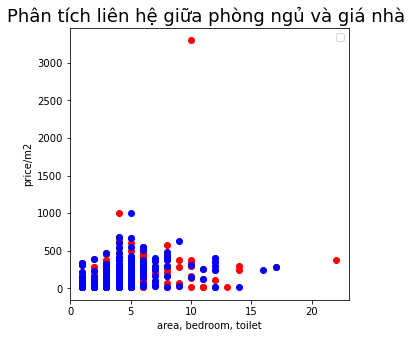

In [37]:
plt.title('Phân tích liên hệ giữa phòng ngủ và giá nhà ', fontsize = 18)
plt.rcParams['figure.figsize'] = 5,5
plt.scatter(x = df['bedroom'], y = df['price/m2'], color='r')
plt.scatter(x = df['toilet'], y = df['price/m2'], color='blue')
plt.xlabel('area, bedroom, toilet')
plt.ylabel('price/m2')
plt.legend()
plt.show()


##### Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).

In [41]:
mean_price = df.groupby('type_of_land').agg(mean_price = ('price/m2','mean')).reset_index()

In [42]:
mean_price

,type_of_land,mean_price
0,Bán nhà mặt phố,364.232061
1,Bán nhà riêng,120.361342
2,Bất động sản khác,209.913889
3,Chung cư,26.826441
4,"Tập thể, cư xá",33.353623
5,Đất thổ cư,133.153750


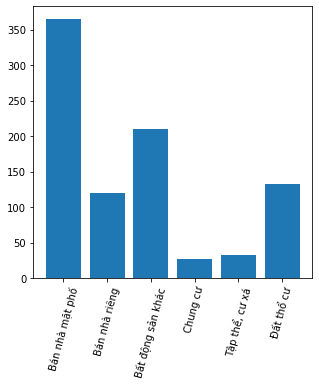

In [45]:
plt. bar(mean_price['type_of_land'], mean_price['mean_price'])
plt.xticks(rotation=75);

##### Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

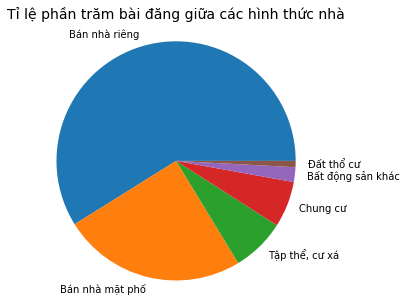

In [49]:
data = df['type_of_land'].value_counts()
plt.title('Tỉ lệ phần trăm bài đăng giữa các hình thức nhà', fontsize = 14)
plt.pie(x = data, labels = data.index, radius = 1.1);

##### Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.

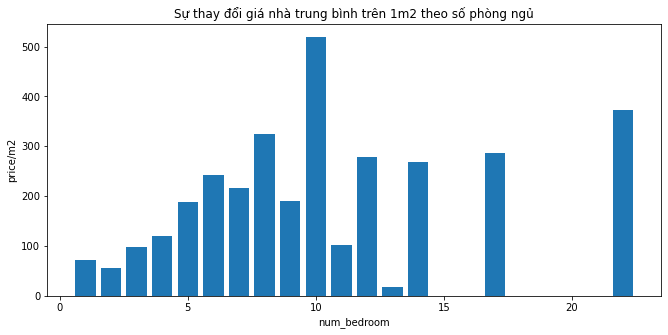

In [64]:
data = df.groupby('bedroom')['price/m2'].mean()
plt.bar(x = data.index, height= data.values)
plt.title('Sự thay đổi giá nhà trung bình trên 1m2 theo số phòng ngủ')
plt.xlabel('num_bedroom')
plt.ylabel('price/m2')
plt.rcParams['figure.figsize'] = 15,5